In [4]:
import pandas as pd

In [5]:
#파일 input
df_sat=pd.read_csv('satisfaction.csv', encoding='cp949')#생활_만족도.csv
df_ar=pd.read_csv('around_env.csv', encoding='cp949')#주변환경.csv
df_cul=pd.read_csv('culture.csv', encoding='cp949')#문화환경.csv
df_gr=pd.read_csv('green.csv', encoding='cp949')#녹지환경.csv
df_no=pd.read_csv('noise.csv', encoding='cp949')#소음_진동.csv
df_tr=pd.read_csv('transportation.csv', encoding='cp949')#교통수단.csv
df_he=pd.read_csv('healthcare.csv', encoding='cp949')#의료.csv
df_le=pd.read_csv('life_env.csv', encoding='cp949')#생활환경.csv

#하나의 데이터 프레임으로 합침(df변수)
df=pd.DataFrame(df_sat['10점 평균'])
#df['suitable for exercise']=pd.Series(df_ar['exercise'], index=df.index)#체육시설
df['공공시설']=pd.Series(df_ar['public'], index=df.index)#공공시설
df['안전']=pd.Series(df_ar['safe'], index=df.index)  #안전
df['문화']=pd.Series(df_cul['10점 평균'], index=df.index) #문화
df['녹지']=pd.Series(df_gr['10점 평균'], index=df.index) #녹지
df['소음']=pd.Series(df_cul['10점 평균'], index=df.index) #소음
df['교통']=pd.Series(df_tr['종합'], index=df.index) #교통
df['의료']=pd.Series(df_he['10점 평균'], index=df.index)#의료
df=df.rename(columns={'10점 평균':'만족도'})
df.head() #df확인 및 컬럼명 확인

,만족도,공공시설,안전,문화,녹지,소음,교통,의료
0,6.36,6.39,6.31,5.78,5.93,5.78,6.81,6.66
1,6.34,6.35,6.32,5.77,5.89,5.77,6.80,6.64
2,6.37,6.42,6.29,5.78,5.96,5.78,6.82,6.67
3,6.82,6.58,6.21,5.76,5.75,5.76,6.54,6.44
4,6.48,6.36,6.07,5.96,5.73,5.96,6.84,6.60


In [6]:
#선형회귀전 데이터와 삶의 만족도 상관관계 파악
corr_matrix=df.corr()
corr_matrix["만족도"].sort_values(ascending=False)
corr_df=pd.DataFrame(corr_matrix["만족도"].sort_values(ascending=False))
corr_df.head()

,만족도
만족도,1.000000
문화,0.379736
소음,0.379736
녹지,0.258024
안전,0.233537


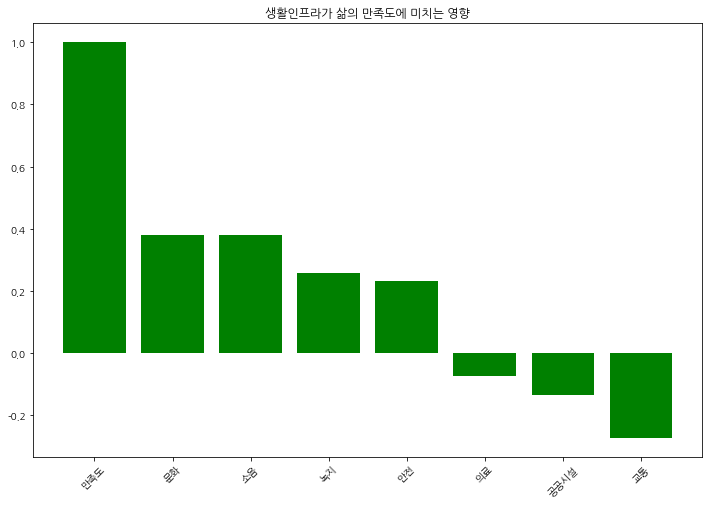

In [7]:
#데이터와 만족도 상관관계 시각화
import matplotlib.pyplot as plt
import matplotlib
import platform

matplotlib.rcParams['axes.unicode_minus'] = False 
x = corr_df.index
y = corr_df["만족도"]
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(12,8))

plt.bar(x, y,color='green')
plt.title("생활인프라가 삶의 만족도에 미치는 영향")
plt.xticks(rotation=45)
plt.savefig('./Correlation.png')

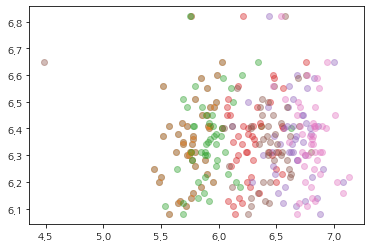

In [8]:
#생활인프라별 삶의 만족도 분포도 
plt.scatter(df[['문화']], df[['만족도']], alpha=0.4) 
a = plt
plt.scatter(df[['소음']], df[['만족도']], alpha=0.4) 
b = plt
plt.scatter(df[['녹지']], df[['만족도']], alpha=0.4) 
c = plt
plt.scatter(df[['안전']], df[['만족도']], alpha=0.4)
d = plt
plt.scatter(df[['의료']], df[['만족도']], alpha=0.4)
e = plt
plt.scatter(df[['공공시설']], df[['만족도']], alpha=0.4)
f = plt
plt.scatter(df[['교통']], df[['만족도']], alpha=0.4)
g = plt

#plt.savefig('./Distribution_chart.png')

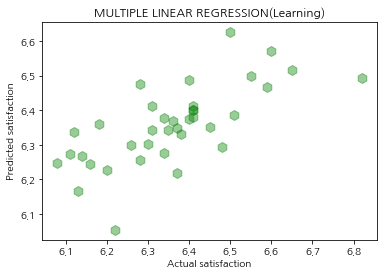

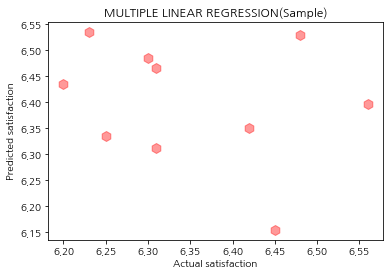

In [14]:
from sklearn.model_selection import train_test_split
# #train데이터 test데이터(샘플데이터) 나누기 
x = df[['공공시설','안전','문화','녹지','소음','교통','의료']]
y = df[['만족도']]
# #x_train:학습데이터(독립변수) x_test:샘플데이터(독립변수) y_train:정답데이터(종속변수) y_test:샘플정답데이터(종속변수)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2) #훈련용 데이터와 평가용 데이터 분할하기.
#print(y_test)

#다중선형회귀 학습
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()#모델불러오기
mlr.fit(x_train, y_train) #모델학습

#다중선형회귀 학습모델로 학습 데이터 예측
y_predict = mlr.predict(x_train)

#학습 데이터 예측 시각화
import matplotlib.pyplot as plt
plt.scatter(y_train, y_predict, alpha=0.4, color='green',marker='h',s=100)
plt.xlabel("Actual satisfaction")
plt.ylabel("Predicted satisfaction")
plt.title("MULTIPLE LINEAR REGRESSION(Learning)")
plt.savefig('./MULTIPLE_LINEAR_REGRESSION(Learning).png')
plt.show()

#다중선형회귀 학습모델로 샘플데이터 예측
y_predict = mlr.predict(x_test)

#샘플 데이터 예측 시각화
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4,color='red',marker='h',s=100)
plt.xlabel("Actual satisfaction")
plt.ylabel("Predicted satisfaction")
plt.title("MULTIPLE LINEAR REGRESSION(Sample)")
plt.savefig('./MULTIPLE_LINEAR_REGRESSION(Sample).png')
plt.show()

In [15]:
#예측 결정계수:모델이 실제 현상을 잘 예측하는지 확인해보는 것. #(R^2)결정걔수(1에 가까울수록 예측 정확도가 높다)
print(mlr.score(x_train, y_train))

0.48548515342325393


In [16]:
#mse(mean squared error) : 평가지표
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_predict)
print(mse)

0.033293755494980995


In [17]:
#회귀계수 확인
mlr.coef_

array([[ 0.04766122,  0.58349931,  0.19727616, -0.04152546,  0.19727616,
        -0.58326413, -0.08353051]])

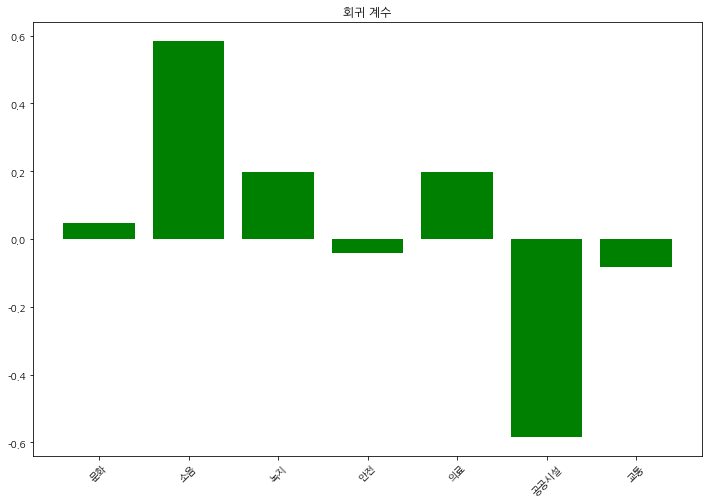

In [18]:
#회귀계수 시각화
label=['문화','소음','녹지','안전','의료','공공시설','교통']
#회귀계수 추출
data=mlr.coef_
data=list(data[0])

plt.figure(figsize=(12,8))
plt.bar(label, data,color='green')
plt.title("회귀 계수")
plt.xticks(rotation=45)
plt.savefig('./Regression_coefficient..png')